# 대주제 : 경제 지표에 따른 사회 변화

# 세부 주제 : 경제지표에 따른 취업자/실업자 상관관계 파악

- 목표
2004~2021년의 GNI와 취업자/실업자 통계 자료를 통해 GNI에 따른 사회 변화를 알아보고자 한다.

공공데이터 출처 
- 국가지표체계 (https://www.index.go.kr/unify/idx-info.do?idxCd=4221#)
- 통계청 (https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1DA7024&vw_cd=MT_ZTITLE&list_id=B1A_101_120&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do)

분석 기준
- 연령별 경제활동인구 중 15세 이상 전체를 기준으로 함.
- GNI의 기준은 실질국민총소득으로 함
- GNI와 취업자 / GNI와 실업자로 구분

* 실질국민총소득(GNI)
- 우리나라 국민이 국내는 물론 국외에서 벌어들인 소득의 실질구매력을 나타내는 지표 
- 실질 GDP에서 외국인이 국내에서 벌어간 실질소득은 차감하고 우리 국민이 국외에서 벌어들인 실질소득은 더하여 산출.



In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
FILE = r'C:\Users\장마가\Desktop\새 폴더\dataFiles\취업, 실업_20230106001304.csv'
df = pd.read_csv(FILE,encoding='euc-kr')
df

,연령계층별,2004,2004.1,2004.2,2004.3,2004.4,2004.5,2005,2005.1,2005.2,...,2020.2,2020.3,2020.4,2020.5,2021,2021.1,2021.2,2021.3,2021.4,2021.5
0,연령계층별,경제활동인구 (천명),취업자 (천명),실업자 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),경제활동인구 (천명),취업자 (천명),실업자 (천명),...,실업자 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),경제활동인구 (천명),취업자 (천명),실업자 (천명),경제활동참가율 (%),실업률 (%),고용률 (%)
1,15세 이상 전체,23544,22682,862,62.3,3.7,60.0,23718,22831,887,...,1108,62.5,4.0,60.1,28310,27273,1037,62.8,3.7,60.5
2,15 - 19세,300,258,42,9.8,14.0,8.4,275,241,34,...,16,7.2,8.7,6.6,188,171,16,8.1,8.7,7.4
3,20 - 29세,4722,4352,371,66.5,7.8,61.2,4599,4244,355,...,355,61.2,9.0,55.7,4016,3706,309,62.2,7.7,57.4
4,30 - 39세,6452,6253,198,75.0,3.1,72.7,6420,6207,213,...,195,78.0,3.5,75.3,5434,5257,177,77.8,3.3,75.3
5,40 - 49세,6388,6241,148,79.2,2.3,77.4,6471,6307,164,...,164,79.1,2.5,77.1,6463,6311,152,79.2,2.4,77.3
6,50 - 59세,3387,3310,77,69.6,2.3,68.0,3598,3507,90,...,191,76.6,2.9,74.3,6592,6422,170,77.1,2.6,75.1
7,60세이상,2294,2268,26,37.8,1.2,37.3,2355,2324,31,...,188,44.0,3.6,42.4,5618,5406,212,44.5,3.8,42.9
8,15 - 64세,22306,21453,853,66.3,3.8,63.8,22423,21545,878,...,1003,68.6,4.0,65.9,25198,24280,918,69.0,3.6,66.5
9,15 - 24세,2231,1999,232,35.1,10.4,31.4,2075,1864,211,...,158,28.2,10.5,25.2,1519,1390,129,29.6,8.5,27.0


In [110]:
df.info()
# df(연령에 따른 취업 정보)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Columns: 109 entries, 연령계층별 to 2021.5
dtypes: object(109)
memory usage: 9.5+ KB


In [129]:
# 15세 이상 취업자.int로 변환.DF프레임.
chdf = df.iloc[1,2::6].astype('int').to_frame()

# 인덱스 새로 만들기 => index,1 열 변환(year,취업자)
chdf = chdf.reset_index().rename(columns={'index':'year',1:'취업자'})
chdf


,year,취업자
0,2004.1,22682
1,2005.1,22831
2,2006.1,23188
3,2007.1,23561
4,2008.1,23775
5,2009.1,23688
6,2010.1,24033
7,2011.1,24527
8,2012.1,24955
9,2013.1,25299


In [112]:
chdf.year = chdf.year.apply(lambda x:str(x)[:4])
2###.01 => str 앞 4글자만 가져오기

2

In [113]:
# 15세 이상 실업자.int로 변환.DF프레임.
sdf = df.iloc[1,3::6].to_frame()#인덱스 새로 만들기 => index,1 열 변환(year,취업자)
sdf = sdf.reset_index().rename(columns={'index':'year',1:'실업자'})
sdf


,year,실업자
0,2004.2,862
1,2005.2,887
2,2006.2,836
3,2007.2,790
4,2008.2,776
5,2009.2,894
6,2010.2,924
7,2011.2,863
8,2012.2,826
9,2013.2,808


In [114]:
sdf.year = chdf.year.apply(lambda x:str(x)[:4])
#.  2###.01 => str 앞 4글자만 가져오기
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    18 non-null     object
 1   실업자     18 non-null     object
dtypes: object(2)
memory usage: 416.0+ bytes


In [115]:
# 취업자와 실업자.merge
mergedf = pd.merge(chdf,sdf,left_on='year',right_on='year',how='inner')
mergedf

,year,취업자,실업자
0,2004,22682,862
1,2005,22831,887
2,2006,23188,836
3,2007,23561,790
4,2008,23775,776
5,2009,23688,894
6,2010,24033,924
7,2011,24527,863
8,2012,24955,826
9,2013,25299,808


In [116]:
FILE2 = r'C:\Users\장마가\Desktop\새 폴더\dataFiles\GNI_RE422101_20230106003844819_excel.xlsx'
# 1인당 국민총소득 (GNI) 가져오기
df2 = pd.read_excel(FILE2)
df2

C:\Users\장마가\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계표명:,1인당 국민총소득과 증가율,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,단위:,"만 원, %",NaN,NaN,NaN
1,NaN,1인당 실질 국민총소득(만 원),전년 대비 증가율(%),1인당 명목 국민총소득(만 원),전년 대비 증가율(%)
2,2003,"2,244",2.1,"1,742",6.2
3,2004,"2,331",3.9,"1,886",8.3
4,2005,"2,383",2.2,"1,973",4.6
5,2006,"2,465",3.4,"2,070",4.9
6,2007,"2,592",5.2,"2,233",7.9
7,2008,"2,582",-0.4,"2,354",5.4
8,2009,"2,633",2.0,"2,441",3.7
9,2010,"2,808",6.7,"2,673",9.5


In [117]:
df2 = df2.head(21)     # 위에서 21번째까지 가져오기
df2 = df2.drop([0,1])  # index[0,1] 삭제
df2

,통계표명:,1인당 국민총소득과 증가율,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,2003,"2,244",2.1,"1,742",6.2
3,2004,"2,331",3.9,"1,886",8.3
4,2005,"2,383",2.2,"1,973",4.6
5,2006,"2,465",3.4,"2,070",4.9
6,2007,"2,592",5.2,"2,233",7.9
7,2008,"2,582",-0.4,"2,354",5.4
8,2009,"2,633",2.0,"2,441",3.7
9,2010,"2,808",6.7,"2,673",9.5
10,2011,"2,832",0.8,"2,799",4.7
11,2012,"2,900",2.4,"2,899",3.6


In [118]:
# GNP = 두번째열 
# 그 외 Unnamed 삭제, 열 이름 바꾸기 
df2 = df2.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df2 = df2.rename(columns={'통계표명:':'year','1인당 국민총소득과 증가율':'국민총소득'})


In [119]:
# 국민총소득 = float로 변환
df2['국민총소득']=df2['국민총소득'].apply(lambda x:float(x.replace(',','')))
df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 2 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    19 non-null     object 
 1   국민총소득   19 non-null     float64
dtypes: float64(1), object(1)
memory usage: 436.0+ bytes


In [120]:
# 취업자, 실업자 병합
result = pd.merge(df2,chdf,left_on='year',right_on='year')
result


,year,국민총소득,취업자
0,2004,2331.0,22682
1,2005,2383.0,22831
2,2006,2465.0,23188
3,2007,2592.0,23561
4,2008,2582.0,23775
5,2009,2633.0,23688
6,2010,2808.0,24033
7,2011,2832.0,24527
8,2012,2900.0,24955
9,2013,2998.0,25299


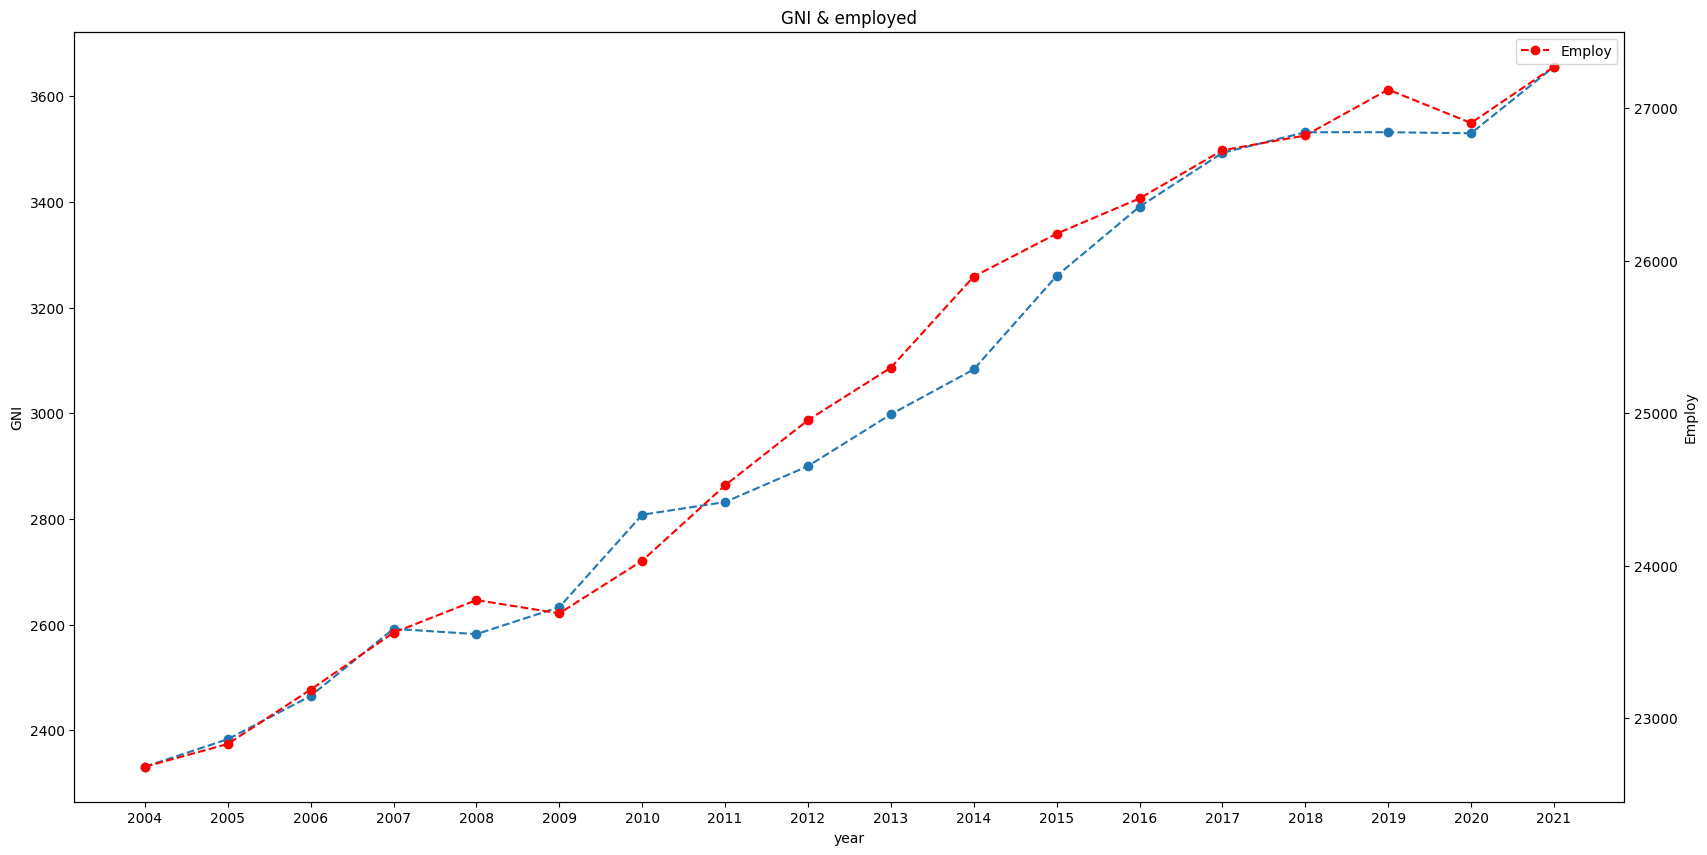

In [123]:
# twinx => x열에 두 개의 y열 만들기

fig, ax1 = plt.subplots(figsize = (20, 10))                               # fig(graph), ax1을 subplots로 설정 (fig사이즈 설정)
ax1.plot(result.year,result.국민총소득,'--o',label="GNI")                  # ax1.plot(첫번째 인자=x축, 두번째 인자=ycnr)
ax2 = ax1.twinx()                                                         # twinx = x축에 두개의 y인자
ax2.plot(result.year,result.취업자,'--o',color='red',label="Employ")      # 
# plt.xticks([1, 6, 11, 16])
ax1.set_xlabel("year")
ax1.set_ylabel("GNI")
ax2.set_ylabel("Employ")
plt.title("GNI & employed")

plt.legend()


In [80]:
result2 = pd.merge(df2,sdf,left_on='year',right_on='year')
result2.loc[:,['실업자']]=result2.loc[:,['실업자']].astype("float")
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    18 non-null     object 
 1   국민총소득   18 non-null     float64
 2   실업자     18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 576.0+ bytes


C:\Users\장마가\AppData\Local\Temp\ipykernel_12028\2260371538.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result2.loc[:,['실업자']]=result2.loc[:,['실업자']].astype("float")


In [81]:
result2 = pd.merge(df2,sdf,left_on='year',right_on='year')
result2

,year,국민총소득,실업자
0,2004,2331.0,862
1,2005,2383.0,887
2,2006,2465.0,836
3,2007,2592.0,790
4,2008,2582.0,776
5,2009,2633.0,894
6,2010,2808.0,924
7,2011,2832.0,863
8,2012,2900.0,826
9,2013,2998.0,808


In [82]:
result2.loc[:,['실업자']]=result2.loc[:,['실업자']].astype("float")
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    18 non-null     object 
 1   국민총소득   18 non-null     float64
 2   실업자     18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 576.0+ bytes


C:\Users\장마가\AppData\Local\Temp\ipykernel_12028\3270349167.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result2.loc[:,['실업자']]=result2.loc[:,['실업자']].astype("float")


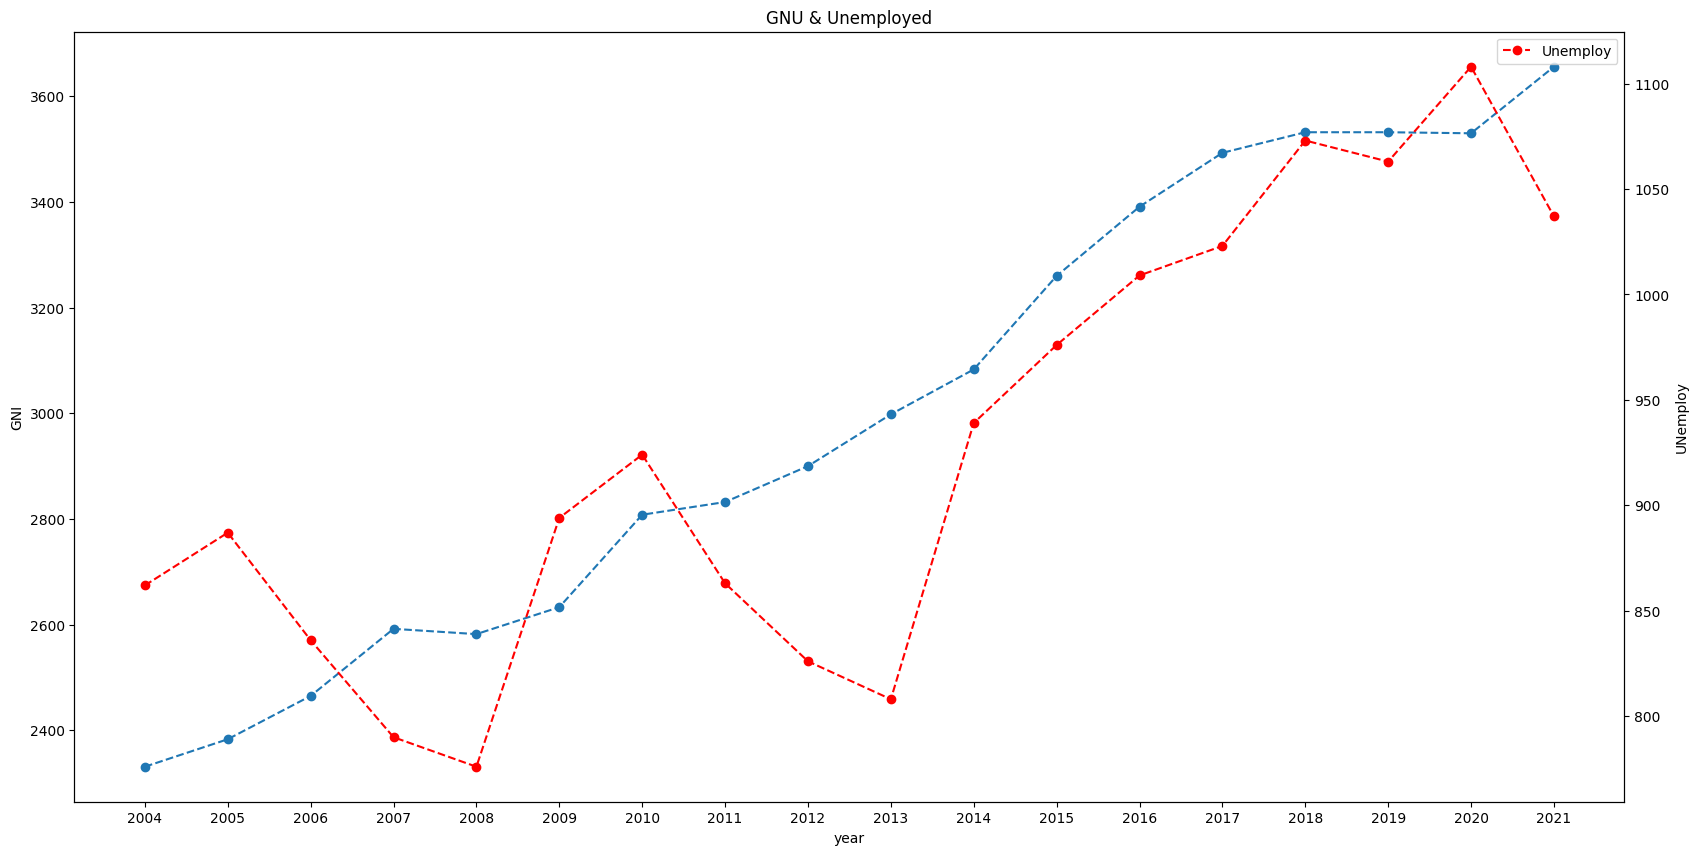

In [122]:
# x2 = result2.year
# y3 = result2.국민총소득
# y4 = result2.실업자

fig, ax3 = plt.subplots(figsize = (20, 10))
ax3.plot(result2.year,result2.국민총소득,'--o',label = "GNI")
ax4 = ax3.twinx()
ax4.plot(result2.year, result2.실업자,'--o',color = 'red',label="Unemploy")

ax3.set_xlabel("year")
ax3.set_ylabel("GNI")
ax4.set_ylabel("UNemploy")
plt.title("GNI & Unemployed")
plt.legend()


In [127]:
# 취업자-실업자
mergedf[0,[]]

,year,취업자,실업자
0,2004,22682,862
1,2005,22831,887
2,2006,23188,836
3,2007,23561,790
4,2008,23775,776
5,2009,23688,894
6,2010,24033,924
7,2011,24527,863
8,2012,24955,826
9,2013,25299,808


In [58]:
# #산포도 
# # 학습용 데이터
# plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
# # 테스트용 데이터
# plt.scatter(X_test[:, 0], X_test[:, 1], c ='red', marker = 'D', s = 100)
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.show()

In [121]:
result.corr(method='pearson')


C:\Users\장마가\AppData\Local\Temp\ipykernel_12028\699933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result.corr(method='pearson')


,국민총소득,취업자
국민총소득,1.000000,0.992345
취업자,0.992345,1.000000


In [103]:
result2.corr(method='pearson')

C:\Users\장마가\AppData\Local\Temp\ipykernel_12028\4137356046.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result2.corr(method='pearson')


,국민총소득,실업자
국민총소득,1.000000,0.849119
실업자,0.849119,1.000000


In [ ]:
# 결론
# - 국민 총 소득과 관련된 